In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
ticker = 'CL=F'

data = yf.download(ticker, start='2022-01-01', end='2025-04-07', progress=False)
close_prices = data['Close']

returns = close_prices.pct_change().dropna()
sigma = returns.std() * np.sqrt(252)

r = 0.0425
S0 = close_prices.iloc[-1]
T = 1
num_steps = 252
n_sims = 10_000

YF.download() has changed argument auto_adjust default to True


In [3]:
## underlying asset = activo subyacente
def simulate_prices(S0, r, sigma, T, num_steps, n_sims):
    dt = T / num_steps
    Z = np.random.normal(size=(n_sims, num_steps)) ## parámetros estándar : 0 y 1
    simulated_returns = (r - 0.5 * sigma.iloc[0]**2) * dt + sigma.iloc[0] * np.sqrt(dt) * Z
    simulared_cumulative_returns = np.cumsum(simulated_returns, axis=1)
    simulated_prices = S0.iloc[0] * np.exp(simulared_cumulative_returns)
    return simulated_prices

# 1. Completa las funciones:

In [4]:
def get_price__fixed_strike__average_price(simulated_prices, K, r, T, option_type):
    avg_prices = np.mean(simulated_prices[:, 1:], axis=1)

    if option_type == 'call':
        payoffs = np.maximum(avg_prices - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - avg_prices, 0)

    option_price =  np.exp(-r * T) * np.mean(payoffs)
    return option_price


def get_price__floating_strike__average_price(simulated_prices, ST, r, T, option_type):
    avg_prices = np.mean(simulated_prices[:, 1:], axis=1)

    if option_type == 'call':
        payoffs = np.maximum(avg_prices - ST, 0)
    elif option_type == 'put':
        payoffs = np.maximum(ST - avg_prices, 0)
    
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price



def get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, option_type):
    geometric_prices = np.exp(np.mean(np.log(simulated_prices[:, 1:]), axis=1))

    if option_type == 'call':
        payoffs = np.maximum(geometric_prices - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - geometric_prices, 0)

    option_price =  np.exp(-r * T) * np.mean(payoffs)
    return option_price



def get_price__floating_strike__geometric_price(simulated_prices, ST, r, T, option_type):
    geometric_prices = np.exp(np.mean(np.log(simulated_prices[:, 1:]), axis=1))

    if option_type == 'call':
        payoffs = np.maximum(geometric_prices - ST, 0)
    elif option_type == 'put':
        payoffs = np.maximum(ST - geometric_prices, 0)
    
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price



def get_price__european(simulated_prices, K, r, T, option_type):
    final_price = simulated_prices[:, -1]

    if option_type == 'call':
        payoffs = np.maximum(final_price - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - final_price, 0)
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price


# 2. Compara los precios de las primas para una opción europea, opción asiática Fixed Strike con media aritmética y  opción asiática Fixed Strike con media geométrica.

## Grafica en el eje Y el precio de la prima y en X diferentes precios Strike. Observa los precios

In [5]:
simulated_prices = simulate_prices(S0, r, sigma, T, num_steps, n_sims)

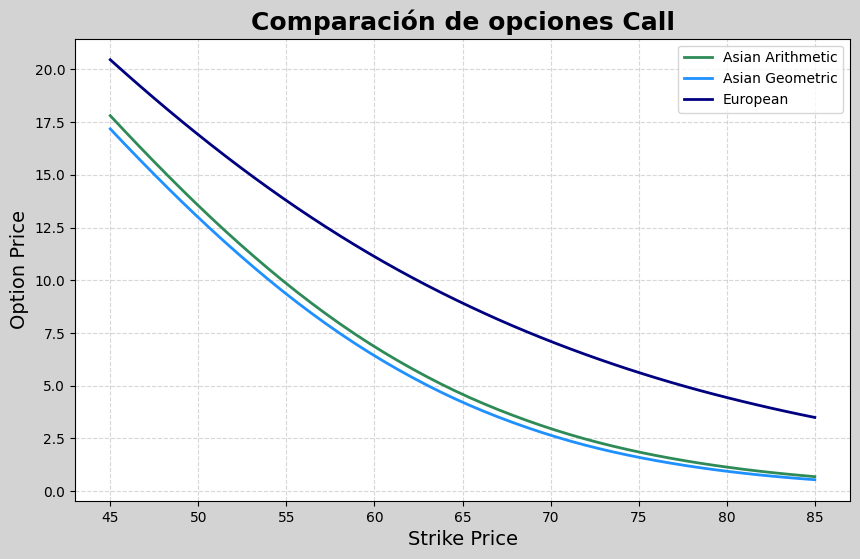

In [6]:
k = np.linspace(65-20, 65+20)
type = 'call'

asian_geometric = []
asian_arithmetic = []
european_call = []

for strike in k:
    asian_arithmetic.append(get_price__fixed_strike__average_price(simulated_prices, strike, r, T, type))
    asian_geometric.append(get_price__fixed_strike__geometric_price(simulated_prices, strike, r, T, type))
    european_call.append(get_price__european(simulated_prices, strike, r, T, type))


plt.figure(figsize=(10, 6), facecolor='lightgray', alpha=0.1)

plt.plot(k, asian_arithmetic, label='Asian Arithmetic', c='seagreen', lw=2)
plt.plot(k, asian_geometric, label='Asian Geometric', c='dodgerblue', lw=2)
plt.plot(k, european_call, label='European', c='navy', lw=2)

plt.title('Comparación de opciones Call', fontsize=18, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('Strike Price', fontsize=14)
plt.ylabel('Option Price', fontsize=14)
plt.legend(loc='best')
plt.show()

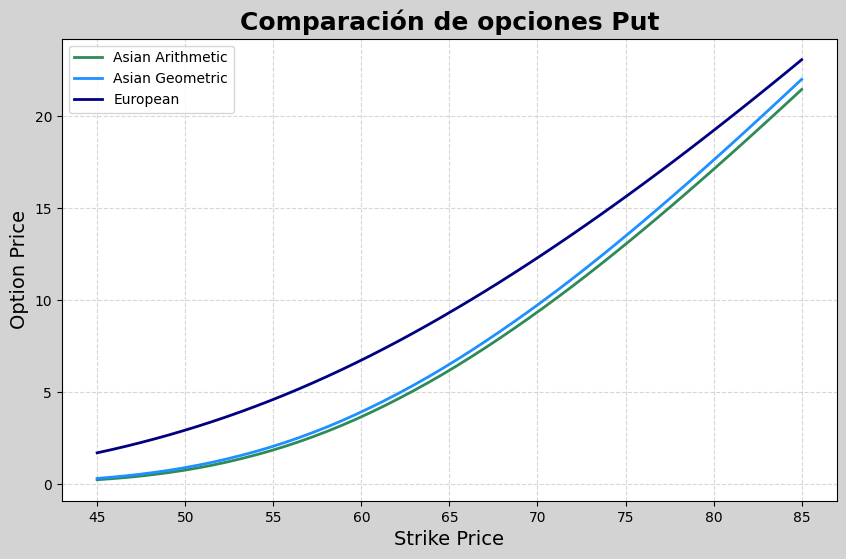

In [7]:
k = np.linspace(65-20, 65+20)
type = 'put'

asian_geometric = []
asian_arithmetic = []
european_call = []

for strike in k:
    asian_arithmetic.append(get_price__fixed_strike__average_price(simulated_prices, strike, r, T, type))
    asian_geometric.append(get_price__fixed_strike__geometric_price(simulated_prices, strike, r, T, type))
    european_call.append(get_price__european(simulated_prices, strike, r, T, type))


plt.figure(figsize=(10, 6), facecolor='lightgray')

plt.plot(k, asian_arithmetic, label='Asian Arithmetic', c='seagreen', lw=2)
plt.plot(k, asian_geometric, label='Asian Geometric', c='dodgerblue', lw=2)
plt.plot(k, european_call, label='European', c='navy', lw=2)

plt.title('Comparación de opciones Put', fontsize=18, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('Strike Price', fontsize=14)
plt.ylabel('Option Price', fontsize=14)
plt.legend(loc='best')
plt.show()

## ¿Cuáles son las más baratas y las más caras? ¿Las más baratas sigue siendo la más baratas sin importar si es una opcion call o put?


**Call:**

+ Las más baratas son las asiáticas geométricas.
+ Las más caras son las europeas.
+ Sin embargo el precio de ambas asiáticas es prácticamente el mismo.

**Put:**

+ Las más baratas son las asiáticas aritméticas.
+ Las más caras son las europeas.
+ Sin embargo el precio de ambas asiáticas es prácticamente el mismo.

## Piensa por qué son estos resultados e interpreta lo que ves 


Las opciones europeas tienen un precio mayor que las asiáticas porque dependen solo del precio final del activo, lo que permite mayor volatilidad, lo que significa, que las hará mas caras. Las opciones asiáticas, al basarse en promedios (geométrico o aritmético), suavizan las fluctuaciones del precio, reduciendo el riesgo y el valor de la prima. 

# 3. Usando simulated prices, obtén el ST promedio.  Con ese ST, calcula los precios de las opciones Floating Strike. Compara los precios vs las Fixed Strike y la europea. 



Imaginando el caso en el que el precio actual es de 67 usd

In [9]:
k = 67
ST_mean = np.mean(simulated_prices[:, -1])

print('-----------------------------------------------')
print(f'ST promedio: {ST_mean:.4f}')
print('-----------------------------------------------')
print('Call:')
print(f'    Fixed Aritmético: {get_price__fixed_strike__average_price(simulated_prices, k, r, T, "call"):.4f}')
print(f'    Fixed Geométrico: {get_price__fixed_strike__geometric_price(simulated_prices, k, r, T, "call"):.4f}')
print(f'\n    Floating Aritmético: {get_price__floating_strike__average_price(simulated_prices, ST_mean, r, T, "call"):.4f}')
print(f'    Floating Geométrico: {get_price__floating_strike__geometric_price(simulated_prices, ST_mean, r, T, "call"):.4f}')
print(f'\n    Europea: {get_price__european(simulated_prices, k, r, T, "call"):.4f}')
print('\n-----------------------------------------------')
print('Put:')
print(f'    Fixed Strike Aritmético: {get_price__fixed_strike__average_price(simulated_prices, k, r, T, "put"):.4f}')
print(f'    Fixed Strike Geométrico: {get_price__fixed_strike__geometric_price(simulated_prices, k, r, T, "put"):.4f}')
print(f'\n    Floating Strike Aritmético: {get_price__floating_strike__average_price(simulated_prices, ST_mean, r, T, "put"):.4f}')
print(f'    Floating Strike Geométrico: {get_price__floating_strike__geometric_price(simulated_prices, ST_mean, r, T, "put"):.4f}')
print(f'\n    Europea: {get_price__european(simulated_prices, k, r, T, "put"):.4f}')
print('-----------------------------------------------')

-----------------------------------------------
ST promedio: 64.5807
-----------------------------------------------
Call:
    Fixed Aritmético: 3.8694
    Fixed Geométrico: 3.5193

    Floating Aritmético: 4.7501
    Floating Geométrico: 4.3718

    Europea: 8.1455

-----------------------------------------------
Put:
    Fixed Strike Aritmético: 7.3798
    Fixed Strike Geométrico: 7.7284

    Floating Strike Aritmético: 5.9420
    Floating Strike Geométrico: 6.2621

    Europea: 10.4642
-----------------------------------------------


## ¿Cuáles son las más baratas y las más caras?


+ En call las más baratas son las fijas, en especial la geométrica.
+ En put las mas baratas son las flotantes, en especial la aritmética.
+ Las mas caras son las europeas en ambos casos.

## ¿Las más baratas sigue siendo la más baratas sin importar si es una opcion call o put?


+ No, en call, las mas baratas son las fijas y en put las flotantes.

## Piensa por qué son estos resultados e interpreta lo que ves 

Los resultados muestran que en opciones Call, las Floating Strike son más valiosas que las Fixed porque comparar el precio final con un promedio (más bajo) genera más ganancia esperada. En las Put, ocurre lo contrario: las Fixed son más caras ya que el strike fijo (más alto que el promedio) genera más valor. Las opciones europeas son las más costosas en ambos casos porque capturan completamente la volatilidad del precio final.